<https://github.com/Teddyzander/McGIF>

In [1]:
! mkdir -p figs

In [2]:
data_path = './data'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [4]:
def phi_cube(T_0, T_1, p, score):
    x = (score - T_0) / (T_1 - T_0)
    if score >= T_1:
        return 1
    elif score < T_0:
        return 0
    elif T_0 <= score < T_0 + (T_1 - T_0) * (1 - p):
        return ((2 * p) / (p - 1) ** 3) * x ** 3 + (3 * p) / (p ** 2 - 2 * p + 1) * x ** 2
    else:
        return ((2 * (p - 1)) / (p ** 3) * x ** 3 + \
                (3 * (p ** 2 - 3 * p + 2)) / (p ** 3) * x ** 2 - \
                (6 * (p ** 2 - 2 * p + 1)) / (p ** 3) * x + \
                (p ** 3 + 3 * p ** 2 - 5 * p + 2) / (p ** 3)
                )


def phi_quad(T_0, T_1, p, score):
    x = (score - T_0) / (T_1 - T_0)
    if score >= T_1:
        return 1
    elif score < T_0:
        return 0
    elif T_0 <= score < T_0 + (T_1 - T_0) * (1 - p):
        return (p / (p - 1) ** 2) * x ** 2
    else:
        return ((p - 1) / p ** 2) * x ** 2 + (-(2 * (p - 1)) / p ** 2) * x + (p ** 2 + p - 1) / p ** 2


def phi_quad2(T_0, T_1, p, score):
    x = (score - T_0) / (T_1 - T_0)
    if score >= T_1:
        return 1
    elif score < T_0:
        return 0
    elif T_0 <= score < T_0 + (T_1 - T_0) * (1 - p):
        return (-2 * p) / (p - 1) * x - p / (p ** 2 - 2 * p + 1) * x ** 2
    else:
        return (3 * p ** 2 - 3 * p + 1) / p ** 2 - (2 * (p ** 2 - 2 * p + 1)) / p ** 2 * x - (p - 1) / p ** 2 * x ** 2


def phi(T_0, T_1, p, score):
    """
    calculate probability of not defaulting fusing piecewise linear function
    :param T_0: lower threshold
    :param T_1: upper threshold
    :param p: fixed probability of returning 1 if inbetween thresholds
    :param score: credit score
    :return: probability [0, 1]
    """
    if score >= T_1:
        return 1
    elif score < T_0:
        return 0
    elif T_0 <= score < T_0 + (T_1 - T_0) * (1 - p):
        return (p / ((T_1 - T_0) * (1 - p))) * (score - T_0)
    else:
        return ((1 - p) / ((T_1 - T_0) * p)) * (score - T_1) + 1


def phi_smooth(T_0, T_1, p, score):
    x = (score - T_0) / (T_1 - T_0)
    if score >= T_1:
        return 1
    elif score < T_0:
        return 0
    else:
        return (30 * p - 12) * x ** 2 + (-60 * p + 28) * x ** 3 + (30 * p - 15) * x ** 4


def decision(p):
    """
    return 0 or 1 determined by probability p
    :param p: probability [0, 1]
    :return: decision {0, 1}
    """
    return np.random.choice([0, 1], p=[1 - p, p])

max diff: 2.046783625730997
max diff: 2.4617387155754122
max diff: 3.718846997791303
max diff: 1.3894230891740467


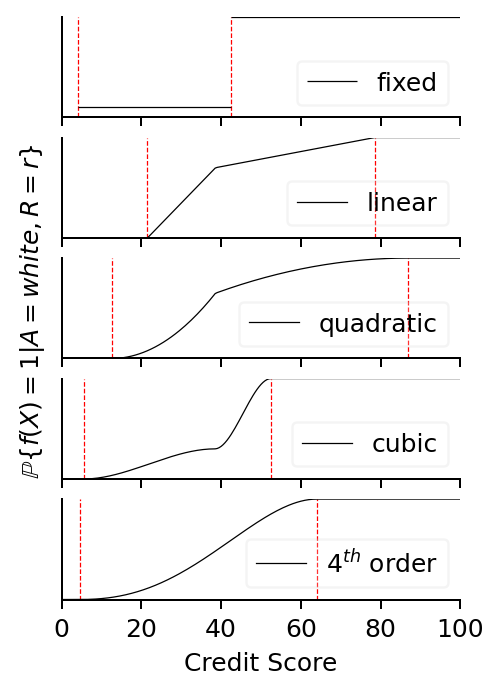

In [5]:
race = ['white', 'black', 'Asian'][0]

if race.lower() == 'white':
    T0s = [4.0, 21.5, 12.5, 5.5, 4.5]
    T1s = [42.5, 78.5, 87.0, 52.5, 64.0]
    probs = [0.10, 0.70, 0.65, 0.30, 0.43]
elif race.lower() == 'black':
    T0s = [22.5, 17.0, 15.0, 17.0, 16.0]
    T1s = [35.0, 31.5, 35.5, 33.0, 36.0]
    probs = [0.78, 0.44, 0.51, 0.49, 0.54]
elif race.lower() == 'asian':
    T0s = [36.5, 33.0, 28.0, 29.5, 29.0]
    T1s = [51.5, 56.5, 55.0, 49.0, 55.0]
    probs = [0.75, 0.70, 0.55, 0.45, 0.57]
else:
    assert 'error'

curves = [0, phi, phi_quad, phi_cube, phi_smooth]
scores = np.linspace(0, 100, 201)
labels = ['fixed', 'linear', 'quadratic', 'cubic', r'$4^{th}$ order']
nrow = 5
ncol = 1;
fig, axs = plt.subplots(nrows=nrow, ncols=ncol, sharey=True, sharex=True, figsize=(4/1.4, 6/1.4), dpi=180)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i in range(0, len(T0s)):
    ytilde = np.zeros(len(scores))
    if i == 0:
        axs[i].vlines(T0s[i], 0, 1, color='r', linestyles='--', linewidth=0.5)
        axs[i].vlines(T1s[i], 0, 1, color='r', linestyles='--', linewidth=0.5)
        axs[i].hlines(0, 0, T0s[i], color='k', linestyles='-', linewidth=0.5)
        axs[i].hlines(probs[i], T0s[i], T1s[i], color='k', linestyles='-', label=labels[i], linewidth=0.5)
        axs[i].hlines(1, T1s[i], 100, color='k', linestyles='-', linewidth=0.5)
    else:
        for j in range(0, len(scores)):
            ytilde[j] = curves[i](T0s[i], T1s[i], probs[i], scores[j])
        axs[i].vlines(T0s[i], 0, 1, color='r', linestyles='--', linewidth=0.5)
        axs[i].vlines(T1s[i], 0, 1, color='r', linestyles='--', linewidth=0.5)
        axs[i].plot(scores, ytilde, color='k', label=labels[i], linewidth=0.5)
        diffs = np.abs(np.diff(ytilde))
        print('max diff: {}'.format(np.max(diffs)*100))
    axs[i].legend(loc='lower right', fancybox=True, framealpha=0.2)
    axs[i].yaxis.set_tick_params(labelleft=False)
    axs[i].spines[['right', 'top']].set_visible(False)
    axs[i].set_yticks([])

plt.xlim([0, 100])
plt.ylim([0, 1.00001])
plt.xlabel(r'Credit Score')
fig.text(0.04, 0.5, f'$\\mathbb{{P}}\\{{f(X)=1|A={race}, R=r\\}}$', va='center', rotation='vertical')

#plt.show()
plt.savefig(
    f'figs/{race.lower()}_curves.pdf',
    dpi=300,
    bbox_inches='tight',
    pad_inches=0)

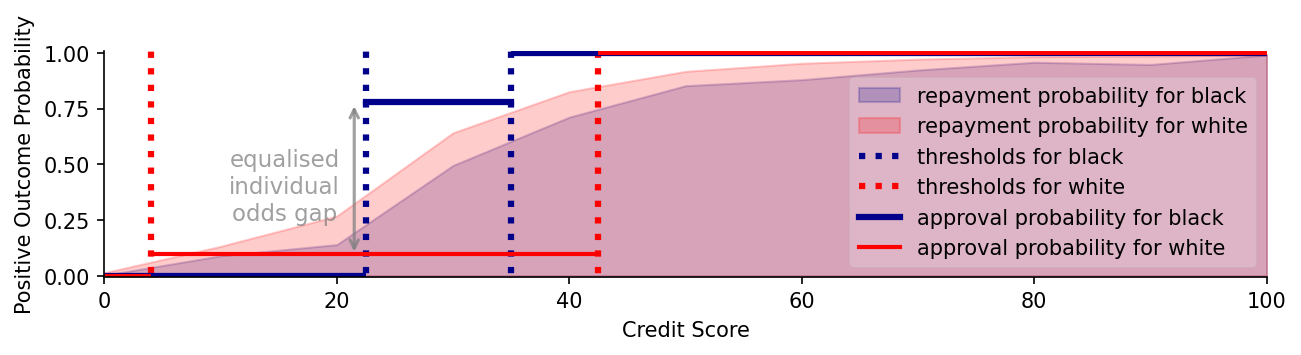

In [23]:
fairness = (
    0  # fixed randomisation
    #1  # preferential randomisation
)
fairness_name = ['fixed_randomisation', 'preferential_randomisation'][fairness]

if fairness:
    T0white = 4.5
    T1white = 64.0
    pwhite = 0.43

    T0black = 16.0
    T1black = 36.0
    pblack = 0.54
else:
    T0white = 4.0
    T1white = 42.5
    pwhite = 0.10

    T0black = 22.5
    T1black = 35.0
    pblack = 0.78

width = 3

xwhite=np.linspace(T0white, T1white, 100)
ywhite = np.linspace(T0white, T1white, 100)
for i in range(0, len(ywhite)):
    if fairness:
        ywhite[i] = phi_smooth(T0white, T1white, pwhite, xwhite[i])
    else:
        ywhite[i] = pwhite # comment out if not using step function

xblack=np.linspace(T0black, T1black, 100)
yblack = np.linspace(T0black, T1black, 100)
for i in range(0, len(ywhite)):
    if fairness:
        yblack[i] = phi_smooth(T0black, T1black, pblack, xblack[i])
    else:
        yblack[i] = pblack # comment out if using not step function

data = np.genfromtxt(f'{data_path}/transrisk_performance_by_race_ssa.csv', delimiter=',')[1:, :]
cdf = np.genfromtxt(f'{data_path}/transrisk_cdf_by_race_ssa.csv', delimiter=',')[1:, :]
totals = np.genfromtxt(f'{data_path}/totals.csv', delimiter=',')[1:, 1:]

total = np.sum(totals)
colors = ['darkblue', 'red', 'green', 'purple'] #plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.figure(figsize=(10, 2), dpi=150)
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

# plt.plot(data[:, 0], 1 - data[:, 2]/100, color=colors[0],  linestyle='dashed',
#          label=r'$\mathbb{P}\{Y=1\vert A=black, R=r\}$')
# plt.plot(data[:, 0], 1 - data[:, 1]/100, color=colors[1], linestyle='dashed',
#          label=r'$\mathbb{P}\{Y=1\vert A=white, R=r\}$')

plt.fill_between(data[:, 0], 1 - data[:, 2]/100, alpha=0.2, color=colors[0], label=r'repayment probability for black')
plt.fill_between(data[:, 0], 1 - data[:, 1]/100, alpha=0.2, color=colors[1], label=r'repayment probability for white')

plt.vlines(T0black, -1, 2, linestyle='dotted', color=colors[0], label=r'thresholds for black', linewidth=width)
plt.vlines(T1black, -1, 2, linestyle='dotted', color=colors[0], linewidth=width)
plt.vlines(T0white, -1, 2, linestyle='dotted', color=colors[1], label=r'thresholds for white', linewidth=width)
plt.vlines(T1white, -1, 2, linestyle='dotted', color=colors[1], linewidth=width)

# plt.hlines(pblack, T0black, T1black, linestyle='-', color=colors[0], label=r'approval probability for black', alpha=1, linewidth=width)
plt.plot(xblack, yblack, linestyle='-', color=colors[0], label=r'approval probability for black', alpha=1, linewidth=width)
plt.hlines(0, 0, T0black, linestyle='-', color=colors[0], alpha=1, linewidth=width)
plt.hlines(1, T1black, 100, linestyle='-', color=colors[0], alpha=1, linewidth=width)
# plt.hlines(pwhite, T0white, T1white, linestyle='-', color=colors[1], label=r'approval probability for white', alpha=1, linewidth=width/1.5)
plt.plot(xwhite, ywhite, linestyle='-', color=colors[1], label=r'approval probability for white', alpha=1, linewidth=width/1.5)
plt.hlines(0, 0, T0white, linestyle='-', color=colors[1], alpha=1, linewidth=width/1.5)
plt.hlines(1, T1white, 100, linestyle='-', color=colors[1], alpha=1, linewidth=width/1.5)

plt.xlim([0, 100])
plt.ylim([-0.005, 1.01])

plt.xlabel(r'Credit Score')
plt.ylabel(r'Positive Outcome Probability')

plt.legend(loc='lower right', fancybox=True, framealpha=0.2)

if fairness:
    plt.text(39.5, 0.17, r'$L_\mathcal{Y} = \max \vert \phi^\prime_a(r) \vert$', va='center', rotation='horizontal', fontsize=16, color='grey', alpha=0.75)

    plt.annotate("", xy=(39.5, 0.25), xytext=(25.5, 0.55),
                arrowprops=dict(arrowstyle="<-", lw=1.5, color='grey', alpha=0.75))
    plt.annotate("", xy=(39.5, 0.25), xytext=(40.5, 0.55),
                arrowprops=dict(arrowstyle="<-", lw=1.5, color='grey', alpha=0.75))
    plt.hlines(0.3, 0, 31, color='grey', linestyle='--', alpha=0.75)
    plt.vlines(22, 0, 0.3, color='grey', linestyle='--', alpha=0.75)
    plt.vlines(31, 0, 0.3, color='grey', linestyle='--', alpha=0.75)
    plt.text(22, -0.08, r'$r$', va='center', ha='center',
           rotation='horizontal', fontsize=12, color='grey', alpha=0.75)
    plt.text(31, -0.08, r'$r^\prime$', va='center', ha='center',
           rotation='horizontal', fontsize=12, color='grey', alpha=0.75)

else:
  plt.text(22.5-7, 0.4, 'equalised\nindividual\nodds gap', va='center', ha='center',
           rotation='horizontal', fontsize=11, color='grey', alpha=0.75)
  plt.annotate("", xy=(22.5-1, 0.09), xytext=(22.5-1, 0.78),
                arrowprops=dict(arrowstyle="<->", lw=1.5, color='grey', alpha=0.75))

#plt.show()
plt.savefig(
    f'figs/{fairness_name}.pdf',
    dpi=300,
    bbox_inches='tight',
    pad_inches=0)

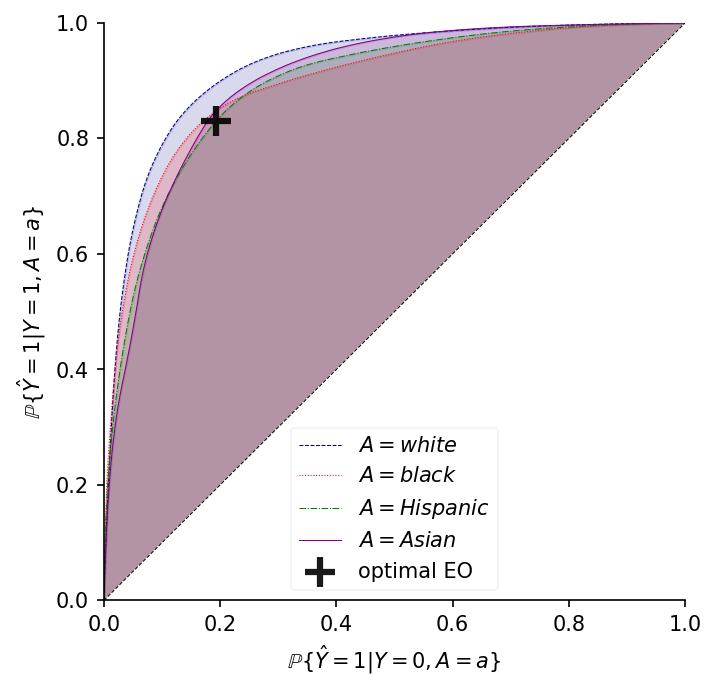

In [46]:
zoom = False

width = 0.5
if zoom:
  width = 2

if zoom:
    plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = False
    plt.rcParams['ytick.right'] = plt.rcParams['ytick.labelright'] = True

    plt.rcParams['axes.spines.right'] = True
    plt.rcParams['axes.spines.left'] = False
else:
    plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = True
    plt.rcParams['ytick.right'] = plt.rcParams['ytick.labelright'] = False

    plt.rcParams['axes.spines.right'] = False
    plt.rcParams['axes.spines.left'] = True


TPR = np.load(f'{data_path}/TPR.npy')
TP_con = np.load(f'{data_path}/TP_con.npy')
FPR = np.load(f'{data_path}/FPR.npy')
FP_con = np.load(f'{data_path}/FP_con.npy')

style = ["dashed", "dotted", "dashdot", "solid"]
groups = ["white", "black", "Hispanic", "Asian"]
colours = ['darkblue', 'red', 'green', 'purple']
x = np.linspace(0, 1, len(FPR[:, 0]))
y = np.linspace(1, 0, len(FPR[:, 0]))
plt.figure(figsize=(5, 5), dpi=150)

for a in range(0, 4):
    plt.plot(FPR[:, a], TPR[:, a], linewidth=width, linestyle=style[a], label=r"$A={}$".format(groups[a]), color=colours[a])
    plt.fill_between(FPR[:, a], TPR[:, a], alpha=0.15, color=colours[a])
    plt.fill_between(x,x,color="white",alpha=1)

plt.plot(x, x, linestyle='--', color='black', linewidth=width)
# plt.plot(x, y, linestyle='--', color='black', linewidth=0.5)
#plt.plot([FP_con], [TP_con], marker="+", markersize=15, markeredgecolor="black",
#         markerfacecolor="black",
#         label="optimal EO", mew=3, )
plt.scatter(FP_con, TP_con, marker="+",
         s=200,
         linewidths=3,
         c='k',
         label="optimal EO",
         zorder=10,
         alpha=0.9,
         )

if zoom:
    plt.xlim([FP_con-0.05, FP_con+0.05])
    plt.ylim([TP_con-0.05, TP_con+0.05])

    plt.text(.153, 0.874, 'not\naccessible', va='center', ha='center', rotation='horizontal', fontsize=11)
    plt.text(.175, 0.855, 'accessible by white\nsub-population', va='center', ha='center', rotation='horizontal', fontsize=11)
    plt.text(.213, 0.81, 'accessible by all\nsub-populations', va='center', ha='center', rotation='horizontal', fontsize=11)
else:
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel(r"$\mathbb{P}\{\hat{Y}=1|Y=0, A=a\}$")
    plt.ylabel(r"$\mathbb{P}\{\hat{Y}=1|Y=1, A=a\}$")

    plt.legend(loc='lower center', fancybox=True, framealpha=0.2)

#plt.show()
plt.savefig(
    f'figs/roc_{zoom}.svg',
    #f'figs/roc_{zoom}.pdf',
    dpi=300,
    bbox_inches='tight',
    pad_inches=0)